In [1]:
# Classify pixels in a volume
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import skimage.transform

In [2]:
IMAGE = h5py.File(Path("../data/images.hdf5"), "r")

SEGS = {
    "Gills": h5py.File(Path("../data/Gills.hdf5"), "r"),
    "Tektites": h5py.File(Path("../data/Tektites.hdf5"), "r"),
    "Rock": h5py.File(Path("../data/Rock.hdf5"), "r"),
}

In [47]:

def resize(image, resized_to: tuple):
    return skimage.transform.resize(image, resized_to)

def get_coregistered_slices(zlayer, resized_to: tuple = None) -> tuple:
    if resized_to is None:
        return (
            IMAGE["data"][zlayer, :, :],
            SEGS["Gills"]["data"][zlayer, :, :],
            SEGS["Tektites"]["data"][zlayer, :, :],
            SEGS["Rock"]["data"][zlayer, :, :],
        )
    else:
        return (
            resize(IMAGE["data"][zlayer, :, :], resized_to),
            resize(SEGS["Gills"]["data"][zlayer, :, :], resized_to),
            resize(SEGS["Tektites"]["data"][zlayer, :, :], resized_to),
            resize(SEGS["Rock"]["data"][zlayer, :, :], resized_to),
        )

In [49]:
# Draw the slices for layer z=100:
zlayer = 1023
slices = get_coregistered_slices(zlayer)
# plt.figure(figsize=(10, 10))
# plt.subplot(1, 3, 1)
# plt.imshow(slices[0], cmap="gray")
# plt.title("Image")
# plt.subplot(1, 3, 2)
# plt.imshow(slices[1], cmap="gray")
# plt.title("Gills")
# plt.subplot(1, 3, 3)
# plt.imshow(slices[2], cmap="gray")
# plt.title("Spherules")
# plt.savefig("slice-1023.png")

In [ ]:
plt.imshow(slices[0], cmap="gray")
plt.imshow(slices[1], cmap="jet", alpha=0.5)
plt.show()

In [56]:
# Train a classifier to predict gills:
X = IMAGE["data"][:, 152:, 137:]
y = SEGS["Gills"]["data"]
# X.shape is a 3D volume (1700, 1915, 1915)
# y.shape is a 2D volume (1534, 744, 672)

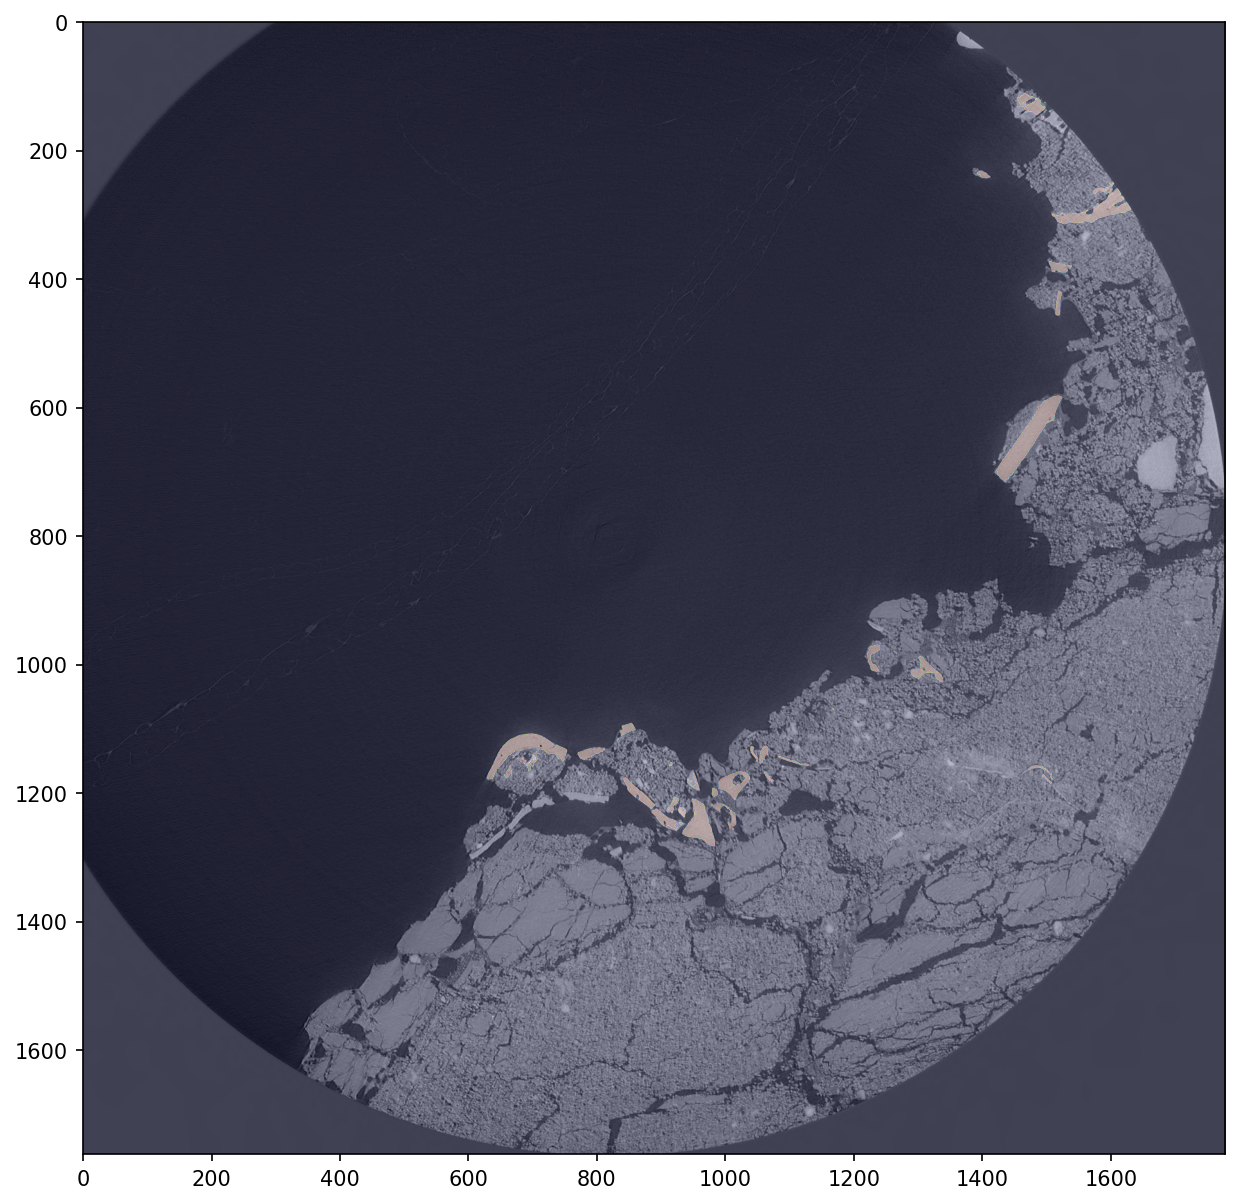

In [61]:
# Draw the slices for layer z=100 overlaid:
plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(X[10], cmap="gray")
# Don't draw where the image is black:
plt.imshow(y[10], cmap="jet", alpha=0.15)

In [62]:
np.save("X.npy", X)
np.save("y.npy", y)